In [1]:
import torch
from torch import nn

from torchsummary import summary
from torchviz import make_dot

import os
import json
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image

# 1

In [2]:
class MyClass(nn.Module):
    def __init__(self, input, output):
        super().__init__()
        self.Layer_1 = nn.Linear(input, 128)
        self.act = nn.ReLU()
        self.Layer_2 = nn.Linear(128, output)
        
    def forward(self, x):
        x = self.Layer_1(x)
        x = self.act(x)
        out = self.Layer_2(x)
        return out
        
        

In [3]:
model = MyClass(512, 10)

In [4]:
print(model)

MyClass(
  (Layer_1): Linear(in_features=512, out_features=128, bias=True)
  (act): ReLU()
  (Layer_2): Linear(in_features=128, out_features=10, bias=True)
)


In [25]:
summary(model)

Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            65,664
├─ReLU: 1-2                              --
├─Linear: 1-3                            1,290
Total params: 66,954
Trainable params: 66,954
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            65,664
├─ReLU: 1-2                              --
├─Linear: 1-3                            1,290
Total params: 66,954
Trainable params: 66,954
Non-trainable params: 0

# 2

In [27]:
class MyModel(nn.Module):
    def __init__(self, inp1, inp2):
        super().__init__()
        self.Linear_1 = nn.Linear(inp1, 52)
        self.act = nn.ReLU()
        self.Linear_2 = nn.Linear(52, 26)
        self.Linear_3 = nn.Linear(26, 18)
        
    def forward(self, x, y):
        x = self.Linear_1(x)
        x = self.act(x + y)
        x = self.Linear_2(x)
        x = self.act(x)
        out = self.Linear_3(x)
        return out

model = MyModel(124, 52)
# summary(model, show_input=True)

In [28]:
random_tensor = torch.rand(1, 124)  
print(random_tensor.shape)

torch.Size([1, 124])


In [ ]:
import torch
from torch import nn

class MyModel(nn.Module):
    def __init__(self, input, input2, output):
        super().__init__()
        self.Linear_1 = nn.Linear(input, input2)
        self.act = nn.ReLU()
        self.Linear_2 = nn.Linear(input2, 26)
        self.Linear_3 = nn.Linear(26, output)
        
    def forward(self, x, y):
        x = self.Linear_1(x)
        x = self.act(x)
        #x = torch.cat((x, y), 1) 
        x = x + y
        x = self.Linear_2(x)
        x = self.act(x)
        out = self.Linear_3(x)
        return out

model = MyModel(124, 52, 18)

In [63]:
import torch
from torch import nn

class MyModel(nn.Module):
    def __init__(self, input, input2, output):
        super().__init__()
        self.Linear_1 = nn.Linear(input, input2)
        self.act = nn.ReLU()
        self.Linear_2 = nn.Linear(52, 26)
        self.Linear_3 = nn.Linear(26, output)
        
    def forward(self, x, y):
        x = self.Linear_1(x)
        x = self.act(x)
        x = x + y
        x = self.Linear_2(x)
        x = self.act(x)
        out = self.Linear_3(x)
        return out

model = MyModel(124, 52, 18)

# 3

### concat Linear

In [64]:
import torch
from torch import nn

class MyModel(nn.Module):
    def __init__(self, input, input2, output):
        super().__init__()
        self.Linear_1 = nn.Linear(input, 20)
        self.act = nn.ReLU()
        self.Linear_2 = nn.Linear(72, 26)
        self.Linear_3 = nn.Linear(26, output)
        
    def forward(self, x, y):
        print("вошло: ",x.shape)
        x = self.Linear_1(x)
        print("выход 1 слоя ",x.shape)
        x = self.act(x)
        print("выход relu ",x.shape)
        x = torch.cat((x, y), 1) 
        print("выход cat ",x.shape)
        # x = x + y
        # print("_ ",x.shape)
        x = self.Linear_2(x)
        print("выход 2 слой ",x.shape)
        x = self.act(x)
        print("выход cat2 ",x.shape)
        out = self.Linear_3(x)
        print("выход 3 слой ",out.shape)
        # return x
        return out

model = MyModel(124, 52, 18)

In [58]:
# print(model)

In [65]:
x = torch.rand(1, 124) 
y = torch.rand(1, 52)  
print(x.shape)
print(y.shape)
q = model(x, y)
print(q.shape)

# z = torch.cat((x, y), 1)


torch.Size([1, 124])
torch.Size([1, 52])
вошло:  torch.Size([1, 124])
выход 1 слоя  torch.Size([1, 20])
выход relu  torch.Size([1, 20])
выход cat  torch.Size([1, 72])
выход 2 слой  torch.Size([1, 26])
выход cat2  torch.Size([1, 26])
выход 3 слой  torch.Size([1, 18])
torch.Size([1, 18])


# 4

In [15]:
import torch
from torch import nn

class MyModel(nn.Module):
    def __init__(self, inp, input2, output):
        super().__init__()
        self.Linear_1 = nn.Linear(inp, 52)
        self.Linear_1_2 = nn.Linear(input2, int(input2/2-10))
        self.act = nn.ReLU()
        self.Linear_2 = nn.Linear(52, 26)
        self.Linear_2_2 = nn.Linear(52, 26)
        self.Linear_3 = nn.Linear(52, output)
        
    def forward(self, x, y):
        x = self.Linear_1(x)
        y = self.Linear_1_2(y)
        
        x = self.act(x)
        y = self.act(y)
        
        x = self.Linear_2(x)
        y = self.Linear_2_2(y)
        
        x = self.act(x)
        y = self.act(y)
        print("x: ",x.shape)
        print("y: ",y.shape)
        out = torch.cat((x, y), 1)
        print("out: ",out.shape)
        out = self.Linear_3(out)
        return out

model = MyModel(124, 124, 18)

In [34]:
x = torch.rand(1, 124) 
y = torch.rand(1, 124) 
print(x.shape)
print(y.shape)
z = torch.cat((x, y), 1)
z.shape

torch.Size([1, 124])
torch.Size([1, 124])


torch.Size([1, 248])

In [17]:
x = torch.rand(1, 124) 
y = torch.rand(1, 124)  
print(x.shape)
print(y.shape)
q = model(x, y)
print(q.shape)

torch.Size([1, 124])
torch.Size([1, 124])
x:  torch.Size([1, 26])
y:  torch.Size([1, 26])
out:  torch.Size([1, 52])
torch.Size([1, 18])


# 5

### создание модели с использованием цикла

In [20]:
import torch
from torch import nn

class MyModel(nn.Module):
  def __init__(self, inp1, outp, hiden_size=19, act="relu"):
    super().__init__()
    self.layers = nn.ModuleList()
    self.activation=({
      "relu":nn.ReLU(),
      "lrelu":nn.LeakyReLU()
    })
    for i in range(9):
        self.layers.add_module(f"Layers_{i}", nn.Linear(inp1, hiden_size))
        self.layers.add_module(f"act_{i}", self.activation[act])
        inp1= hiden_size
        # hiden_size = int(hiden_size - 1)
        hiden_size -= 1
          
    self.layers.add_module(
        "Layers_out", nn.Linear(inp1, outp)
      )
      
    def forward(self, x):
        for layer in self.Module_List():
            x = layer(x)
        return x
      
model = MyModel(20, 10)   

In [19]:
print(model)

MyModel(
  (layers): ModuleList(
    (0): Linear(in_features=20, out_features=19, bias=True)
    (1): ReLU()
    (2): Linear(in_features=19, out_features=18, bias=True)
    (3): ReLU()
    (4): Linear(in_features=18, out_features=17, bias=True)
    (5): ReLU()
    (6): Linear(in_features=17, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=15, bias=True)
    (9): ReLU()
    (10): Linear(in_features=15, out_features=14, bias=True)
    (11): ReLU()
    (12): Linear(in_features=14, out_features=13, bias=True)
    (13): ReLU()
    (14): Linear(in_features=13, out_features=12, bias=True)
    (15): ReLU()
    (16): Linear(in_features=12, out_features=11, bias=True)
    (17): ReLU()
    (18): Linear(in_features=11, out_features=10, bias=True)
  )
)


In [33]:
import torch
from torch import nn

class MyModel(nn.Module):
    def __init__(self, inp1, outp):
        super().__init__()
        self.layers = nn.ModuleList()
    
        for num, i in enumerate(range(19, 10, -1)):
            self.layers.add_module(f"Layers_{num}", nn.Linear(inp1, i))
            self.layers.add_module(f"act_{num}", nn.ReLU())
            inp1= i
              
        self.layers.add_module(
            "Layers_out", nn.Linear(inp1, outp)
          )
      
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
            print(x.shape)
        return x
      
model = MyModel(20, 10)   

In [34]:
x = torch.rand(1, 20) 
y = torch.rand(1, 10)  
print(x.shape)
print(y.shape)
q = model(x)
print(q.shape)

torch.Size([1, 20])
torch.Size([1, 10])
torch.Size([1, 19])
torch.Size([1, 19])
torch.Size([1, 18])
torch.Size([1, 18])
torch.Size([1, 17])
torch.Size([1, 17])
torch.Size([1, 16])
torch.Size([1, 16])
torch.Size([1, 15])
torch.Size([1, 15])
torch.Size([1, 14])
torch.Size([1, 14])
torch.Size([1, 13])
torch.Size([1, 13])
torch.Size([1, 12])
torch.Size([1, 12])
torch.Size([1, 11])
torch.Size([1, 11])
torch.Size([1, 10])
torch.Size([1, 10])


In [26]:
print(model)

MyModel(
  (layers): ModuleList(
    (0): Linear(in_features=20, out_features=19, bias=True)
    (1): ReLU()
    (2): Linear(in_features=19, out_features=18, bias=True)
    (3): ReLU()
    (4): Linear(in_features=18, out_features=17, bias=True)
    (5): ReLU()
    (6): Linear(in_features=17, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=15, bias=True)
    (9): ReLU()
    (10): Linear(in_features=15, out_features=14, bias=True)
    (11): ReLU()
    (12): Linear(in_features=14, out_features=13, bias=True)
    (13): ReLU()
    (14): Linear(in_features=13, out_features=12, bias=True)
    (15): ReLU()
    (16): Linear(in_features=12, out_features=11, bias=True)
    (17): ReLU()
    (18): Linear(in_features=11, out_features=10, bias=True)
  )
)


# 6

### block

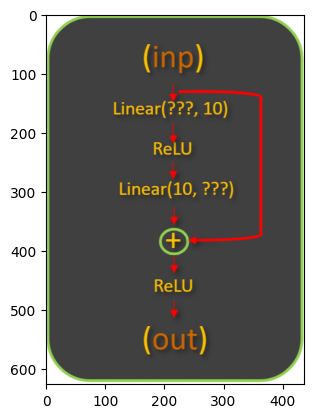

In [4]:
plt.imshow(Image.open("img_1.png"))

In [38]:
class BasicBlock(nn.Module):
    def __init__(self, inp, out):
        super().__init__()
        self.layer = nn.Linear(inp, 10)
        self.act = nn.ReLU()
        self.layer_2 = nn.Linear(10, out)
    def forward(self, x):
        y = self.layer(x)
        y = self.act(y)
        y = self.layer_2(y)
        x = x+y
        output = self.act(x)
        return output


block = BasicBlock(20, 20)
print(block)

BasicBlock(
  (layer): Linear(in_features=20, out_features=10, bias=True)
  (act): ReLU()
  (layer_2): Linear(in_features=10, out_features=20, bias=True)
)


In [40]:
a = torch.rand(16, 20)
q = block(a)
q.shape

torch.Size([16, 20])

# 7

### класс с проходом через другой класс

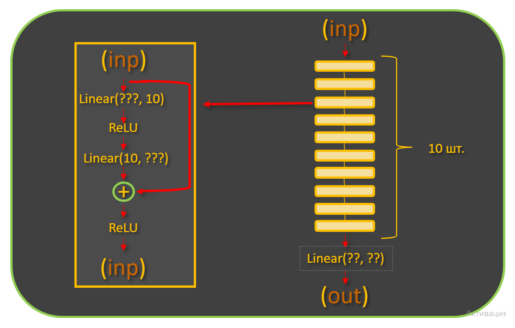

In [27]:
plt.axis("off")
plt.imshow(Image.open("img_2.png"))

In [38]:
class BasicBlock(nn.Module):
    def __init__(self, inp, out):
        super().__init__()
        self.layer = nn.Linear(inp, 10)
        self.act = nn.ReLU()
        self.layer_2 = nn.Linear(10, inp)
        
    def forward(self, x):
        y = self.layer(x)
        y = self.act(y)
        y = self.layer_2(y)
        x = x + y
        output = self.act(x)
        return output


class MyModel(nn.Module):
    def __init__(self, inp, out):
        super().__init__()
        self.objs = [BasicBlock(inp, 10) for i in range(10)]
        self.layers = nn.ModuleList()
        for num, obj in enumerate(self.objs):
           self.layers.add_module(f"layer_{num}", obj) 
        self.layer = nn.Linear(inp, out)
        

        
    def forward(self, x):
        for i, layer in enumerate(self.layers):
            x = layer(x)
        out = self.layer(x)
        return out


model = MyModel(5, 15,)


In [39]:
a = torch.rand(5)
q = model(a)
q.shape

torch.Size([15])

# 8

###  Создайте класс с названием MyModel, с помощью которого можно создать нейронную сеть, как на картинке.
Создайте модель нейронной сети, у которой размер входного тензора равен inp=20, а размеры выходных тензоров равны out_1 15 и out_2 15.   
Результат запишите в переменную model. Нейронная сеть должна возвращать список с out_1 и out_2.

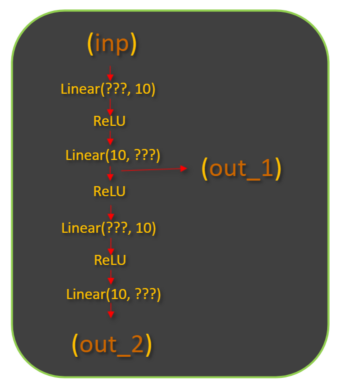

In [40]:
plt.axis("off")
plt.imshow(Image.open("img_3.png"))

In [56]:
class MyModel(nn.Module):
    def __init__(self, inp, out_1, out_2):
        super().__init__()
        self.Linear_1 = nn.Linear(inp, 10)
        self.act = nn.ReLU()
        self.Linear_2 = nn.Linear(10, out_1)
        self.Linear_3 = nn.Linear(out_1, 10)
        self.Linear_4 = nn.Linear(10, out_2)
        self.outs = []
    
    def forward(self, x):
        x = self.Linear_1(x)
        x = self.act(x)
        x = self.Linear_2(x)
        self.outs.append(x)
        y = self.act(x)
        y = self.Linear_3(y)
        print(y.shape)
        y = self.act(y)
        print(y.shape)
        y = self.Linear_4(y)
        self.outs.append(y)
        return self.outs


model = MyModel(20, 15, 15)
# summary(mod)

In [57]:
inp = torch.rand(20, dtype=torch.float32)
out = model(inp)
print(type(out))
out[0].shape, out[1].shape

torch.Size([10])
torch.Size([10])
<class 'list'>


(torch.Size([15]), torch.Size([15]))

In [6]:
x = torch.rand(5, dtype=torch.float32)
y = torch.rand(10, dtype=torch.float32)
print(x.shape)
print(y.shape)
z = torch.cat((x, y))
z.shape

torch.Size([5])
torch.Size([10])


torch.Size([15])

In [7]:
class BasicBlock(nn.Module):
    def __init__(self, inp, out):
        super().__init__()
        self.layer = nn.Linear(inp, 10)
        self.act = nn.ReLU()
        self.layer_2 = nn.Linear(10, out)
        
    def forward(self, x):
        y = self.layer(x)
        y = self.act(y)
        y = self.layer_2(y)
        print(x.shape)
        print(y.shape)
        x = torch.cat((x, y))
        print(y.shape)
        # x = x+y
        output = self.act(x)
        return output

In [8]:
m = BasicBlock(5, 10)
x = torch.rand(5, dtype=torch.float32)
out = m(x)
out.shape

torch.Size([5])
torch.Size([10])
torch.Size([10])


torch.Size([15])

# 9

### Создайте класс с названием MyModel, с помощью которого можно создать нейронную сеть, как на картинке.
Создайте модель нейронной сети, у которой размер входного тензора равен inp=20, а размеры выходных тензоров равны out_1 20, out_2 20 и out_3 10.  Результат запишите в переменную model. Нейронная сеть должна возвращать список  [out_1, out_2, out_3].

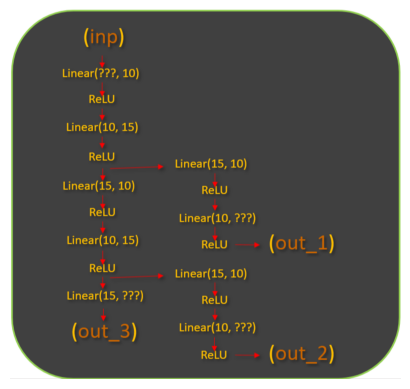

In [5]:
plt.axis("off")
plt.imshow(Image.open("img_4.png"))

In [25]:
class MyModel(nn.Module):
    def __init__(self, inp, out_1, out_2, out_3):
        super().__init__()
        self.act = nn.ReLU()
        self.Linear_1 = nn.Linear(inp, 10)
        self.Linear_2 = nn.Linear(10, 15)
        self.Linear_3 = nn.Linear(15, 10)
        self.Linear_5 = nn.Linear(10, 15)
        self.Linear_4 = nn.Linear(15, out_3)

        self.Linear_1_2 = nn.Linear(10, out_1)
        self.Linear1_3 = nn.Linear(15, 10)
        self.Linear_1_4 = nn.Linear(10, out_2)
        self.Linear1_5 = nn.Linear(15, 10)
        self.outs = []
    
    def forward(self, x):
        x = self.Linear_1(x)
        x = self.act(x)
        y = self.Linear_2(x)
        # self.outs.append(x)
        x = self.act(y)
        y = self.Linear_3(x)
        y = self.act(y)
        y = self.Linear_5(y)
        y = self.act(y)
        out3 = self.Linear_4(y)

        x = self.Linear1_3(x)
        x = self.act(x)
        out1 = self.Linear_1_2(x)
        out1 = self.act(out1)

        y = self.Linear1_5(y)
        y = self.act(y)
        out2 = self.Linear_1_4(y)
        out2 = self.act(out2)
        
        self.outs.append(out1)
        self.outs.append(out2)
        self.outs.append(out3)
        # print(len(self.outs))
        return self.outs


model = MyModel(20, 20, 20, 10)
# summary(mod)

In [26]:
i = torch.rand(20, dtype=torch.float32)

outs = model(i)
print(outs[0].shape)
print(outs[1].shape)
print(outs[2].shape)

torch.Size([20])
torch.Size([20])
torch.Size([10])


# 10

### Создайте класс с названием MyModel, с помощью которого можно создать нейронную сеть, как на картинке.
Создайте модель нейронной сети, у которой размер входного и выходного тензора равен 30. Результат запишите в переменную model.

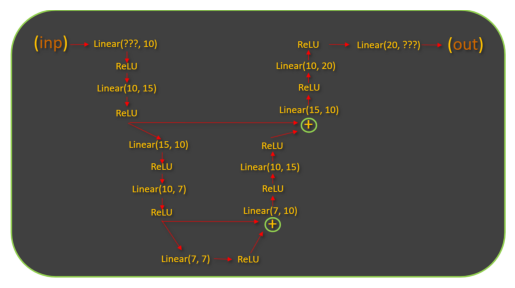

In [27]:
plt.axis("off")
plt.imshow(Image.open("img_5.png"))

In [30]:
class MyModel(nn.Module):
    def __init__(self, inp, out):
        super().__init__()
        self.act = nn.ReLU()
        self.l1 = nn.Linear(inp, 10)
        self.l2 = nn.Linear(10, 15)
        self.l3 = nn.Linear(15, 10)
        self.l4 = nn.Linear(10, 7)
        self.l5 = nn.Linear(7, 7)
        self.l6 = nn.Linear(7, 10)
        self.l7 = nn.Linear(10, 15)
        self.l8 = nn.Linear(15, 10)
        self.l9 = nn.Linear(10, 20)
        self.l10 = nn.Linear(20, out)
        
    
    def forward(self, x):
        x = self.l1(x)
        x = self.act(x)
        x = self.l2(x)
        x = self.act(x)
        
        y = self.l3(x)
        y = self.act(y)
        y = self.l4(y)
        y = self.act(y)

        z = self.l5(y)
        z = self.act(z)

        y = y + z
        y = self.l6(y)
        y = self.act(y)
        y = self.l7(y)
        y = self.act(y)

        x = x + y
        x = self.l8(x)
        x = self.act(x)
        x = self.l9(x)
        x = self.act(x)
        x = self.l10(x)
        
        return x


model = MyModel(30, 30)


In [31]:
i = torch.rand(30, dtype=torch.float32)

outs = model(i)
print(outs.shape)

torch.Size([30])


# 11

### Создайте класс с названием MyModel, с помощью которого можно создать нейронную сеть, как на картинке.  

Имеется набор данных, состоящий из изображений размером 32 на 32 пикселя. С помощью данного набора можно обучить модель классифицировать 50 классов.  
  
Создайте модель нейронной сети на основе класса MyModel, с помощью которой можно обучить классификатор на имеющемся наборе данных. Изображения в нейронную сеть подаются в виде вектора.
Результат запишите в переменную model.
Создайте функцию потерь для нейронной сети и запишите ее в переменную loss_model.
В качестве оптимизатора градиентного спуска выберите Adam со скоростью обучения равной 0.01. Оптимизатор запишите в переменную opt.

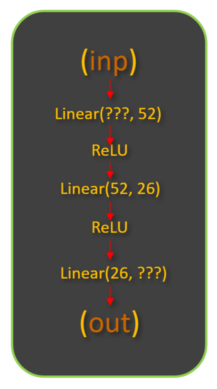

In [2]:
plt.axis("off")
plt.imshow(Image.open("img_6.png"))

In [12]:
class MyModel(nn.Module):
    def __init__(self, inp, out):
        super().__init__()
        self.act = nn.ReLU()
        self.l1 = nn.Linear(inp, 52)
        self.l2 = nn.Linear(52, 26)
        self.l3 = nn.Linear(26, out)

        
    
    def forward(self, x):
        x = self.act(self.l1(x))
        x = self.act(self.l2(x))
        x = self.l3(x)
        return x


model = MyModel((32* 32), 50)


opt = torch.optim.Adam(model.parameters(), lr= 00.1)
loss_model = nn.CrossEntropyLoss()

In [13]:
i = torch.rand(32*32, dtype=torch.float32)

outs = model(i)
print(outs.shape)

torch.Size([50])


# 12

Имеется набор данных, состоящий из изображений размером 15 на 15 пикселей, все изображения преобразованны в вектор. Для всех изображений есть информация о ширине и высоте определенного объекта на них. Вся эта информация хранится в файле с разметкой.  
  
Дана структура нейронной сети (см. на картинке).  
  
В этом упражнении:  
  
Создайте класс с названием MyModel, с помощью которого можно создать нейронную сеть, как на картинке. Под операцией суммирования подразумевается конкатенация векторов.  
Создайте модель нейронной сети на основе класса MyModel, с помощью которой можно предсказывать ширину и высоту нужного объекта на изображении. Помимо изображения в нейронную сеть передается дополнительная информация, закодированная в вектор размером 10. Изображения в нейронную сеть также подаются в виде вектора.  
Созданную модель запишите в переменную model.  
Создайте функцию потерь для нейронной сети и запишите ее в переменную loss_model.  
В качестве оптимизатора градиентного спуска выберите Adam со скоростью обучения равной 0.1. Оптимизатор запишите в переменную opt.  

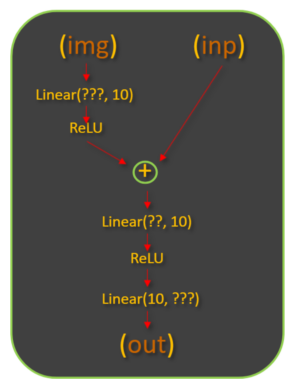

In [14]:
plt.axis("off")
plt.imshow(Image.open("img_7.png"))

In [34]:
class MyModel(nn.Module):
    def __init__(self, img, inp, out):
        super().__init__()
        self.act = nn.ReLU()
        self.l1 = nn.Linear(img, 10)
        self.l2 = nn.Linear(inp+10, 10)
        self.l3 = nn.Linear(10, out)

        
    
    def forward(self, x, y):
        x = self.act(self.l1(x))
        print(x.shape)
        print(y.shape)
        x = torch.cat((x, y))
        x = self.act(self.l2(x))
        x = self.l3(x)
        return x


model = MyModel((15* 15), 10, 2)


opt = torch.optim.Adam(model.parameters(), lr= 0.1)
loss_model = nn.MSELoss()

правильно говорите что y равен 10, когда нужно создать можель. Но на схеме нет y=10, есть inp, который может быть любым числом.
Я могу вам дать прямой ответ, могу наводящими вопросами. Решайте сами какой вариант лучше.
  
  
  
По условию сначала нужно создать модель как на схеме. То есть класс в который передаётся img (в виде вектора), inp (просто вектор) и out (тоже вектор). 
Далее первый линейный слой на вход получает ...
Выход с первого слоя на схеме равен 10, он конкатенируется с inp и это будет входом у второго слоя. Дальше всё просто.
Когда класс создан, то можно создать модель, с параметрами  из условия 2.

In [35]:
i = torch.rand((15*15), dtype=torch.float32)
f = torch.rand(10, dtype=torch.float32)

out = model(i, f)
out.shape



torch.Size([10])
torch.Size([10])


torch.Size([2])